In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from catboost import CatBoostRegressor
from sklearn.model_selection import TimeSeriesSplit

In [8]:
df=pd.read_csv('train.csv')
df['date']=pd.to_datetime(dict(year=df.year,month=df.month,day=df.day))
df.sort_values(['date'],inplace=True)
df.reset_index(inplace=True,drop=True)
date=df.pop('date')

In [117]:
df.dropna(subset=['air temp.'],inplace=True)
df['zon.winds'].fillna(np.random.normal(np.mean(df['zon.winds']),np.std(df['zon.winds'])),inplace=True)
df['mer.winds'].fillna(np.random.normal(np.mean(df['mer.winds']),np.std(df['mer.winds'])),inplace=True)
df['humidity'].fillna(np.random.normal(np.mean(df['humidity']),np.std(df['humidity'])),inplace=True)

In [118]:
x=df.iloc[:,3:-1]
y=df.iloc[:,-1]

In [119]:
tss=TimeSeriesSplit(n_splits=3)
for train,test in tss.split(x):
    x_train,x_test=x.iloc[train,:],x.iloc[test,:]
    y_train,y_test=y.iloc[train],y.iloc[test]

In [120]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [121]:
catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, random_seed=42, verbose=0)

In [122]:
catboost_model.fit(x_train, y_train)

In [123]:
y_pred = catboost_model.predict(x_test)

In [124]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)

In [125]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 0.24447202670536622
R-squared: 0.9545446109965029
Mean Absolute Error: 0.3805474690795615


In [126]:
model_score = catboost_model.score(x_test, y_test)
print(f"Model Score (R²): {model_score}")


Model Score (R²): 0.9545446109965029


        Actual  Predicted
78499    28.61  28.101842
78500    27.98  27.914017
78501    29.48  29.253232
78502    27.52  27.556018
78503    29.66  29.424554
...        ...        ...
104404   22.84  22.765932
104405   29.69  28.981592
104406   22.88  23.371458
104407   28.50  28.527711
104408   27.31  27.405994

[24142 rows x 2 columns]
Predicted Surface Temperature: 29.435821671256477


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


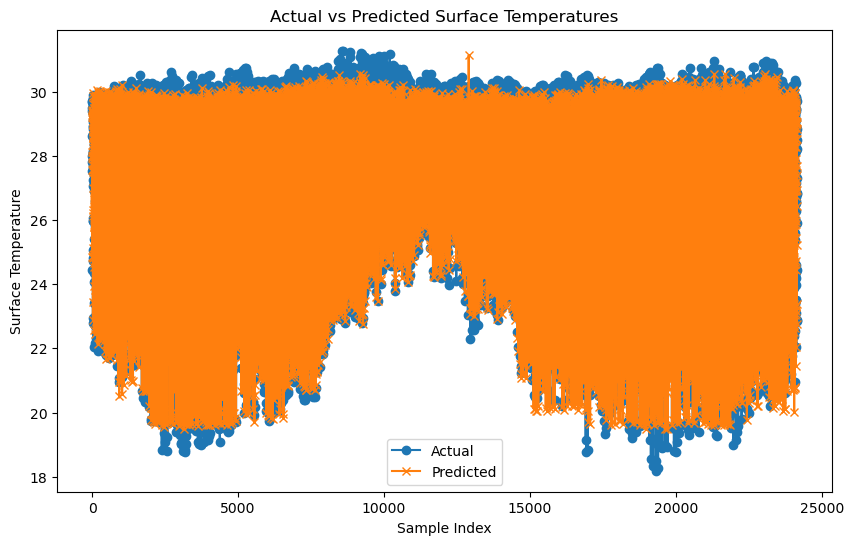

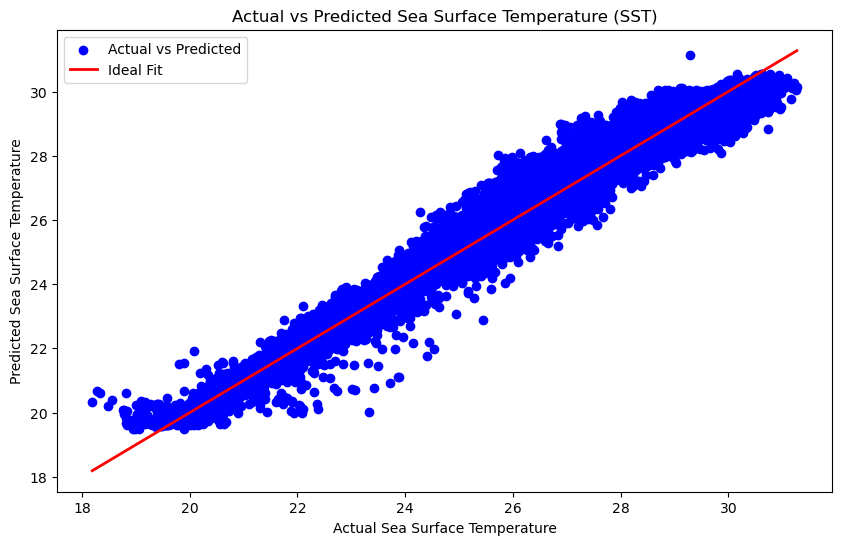

In [127]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results_df)

# Predicting surface temperature for sample data
sample_data = [[-4.99, 156, 4.8, -2.8, 78.5, 28.98]]  
scaled_sample_data = scaler.transform(sample_data)
predicted_temp = catboost_model.predict(scaled_sample_data)
print(f"Predicted Surface Temperature: {predicted_temp[0]}")

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Surface Temperatures')
plt.xlabel('Sample Index')
plt.ylabel('Surface Temperature')
plt.legend()
plt.show()

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Ideal Fit')
plt.xlabel('Actual Sea Surface Temperature')
plt.ylabel('Predicted Sea Surface Temperature')
plt.title('Actual vs Predicted Sea Surface Temperature (SST)')
plt.legend()
plt.show()

In [128]:
df=pd.read_csv('evaluation.csv')
df['date']=pd.to_datetime(dict(year=df.year,month=df.month,day=df.day))
df.sort_values(['date'],inplace=True)
df.reset_index(inplace=True,drop=True)
date=df.pop('date')

In [129]:
df.dropna(subset=['air temp.'],inplace=True)
df['zon.winds'].fillna(np.random.normal(np.mean(df['zon.winds']),np.std(df['zon.winds'])),inplace=True)
df['mer.winds'].fillna(np.random.normal(np.mean(df['mer.winds']),np.std(df['mer.winds'])),inplace=True)
df['humidity'].fillna(np.random.normal(np.mean(df['humidity']),np.std(df['humidity'])),inplace=True)

In [134]:
x = df[['latitude', 'longitude', 'zon.winds', 'mer.winds', 'humidity', 'air temp.']]

In [135]:
pred = catboost_model.predict(x_test)

In [136]:
pred=pd.DataFrame(pred,columns=['s.s.temp.'])
df_pred=pd.concat([df,pred],axis=1)
df_pred.to_csv('eval_pred.csv')

In [137]:
df=pd.read_csv('data_1997_1998.csv')
df['date']=pd.to_datetime(dict(year=df.year,month=df.month,day=df.day))
df.sort_values(['date'],inplace=True)
df.reset_index(inplace=True,drop=True)
date=df.pop('date')

In [138]:
df.dropna(subset=['air temp.'],inplace=True)
df['zon.winds'].fillna(np.random.normal(np.mean(df['zon.winds']),np.std(df['zon.winds'])),inplace=True)
df['mer.winds'].fillna(np.random.normal(np.mean(df['mer.winds']),np.std(df['mer.winds'])),inplace=True)
df['humidity'].fillna(np.random.normal(np.mean(df['humidity']),np.std(df['humidity'])),inplace=True)

In [140]:
x = df[['latitude', 'longitude', 'zon.winds', 'mer.winds', 'humidity', 'air temp.']]

In [141]:
pred = catboost_model.predict(x_test)

In [142]:
pred=pd.DataFrame(pred,columns=['s.s.temp.'])
df_pred=pd.concat([df,pred],axis=1)
df_pred.to_csv('1997_1998_pred.csv')